In [1]:
%matplotlib inline

import numpy as np
import scipy.stats
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

seaborn.set()

In [2]:
df = pd.DataFrame(columns=['num_proteins', 'search_time_ms'])
subset_db_sizes = [x*125000 for x in [2**x for x in range(7)]]
subset_db_sizes.append(165635472)
df['num_proteins'] = np.array(subset_db_sizes)
df['search_time_ms'] = np.array([27, 62, 91, 278, 511, 639, 2846, 30020])
df

num_proteins  search_time_ms
0        125000              27
1        250000              62
2        500000              91
3       1000000             278
4       2000000             511
5       4000000             639
6       8000000            2846
7     165635472           30020

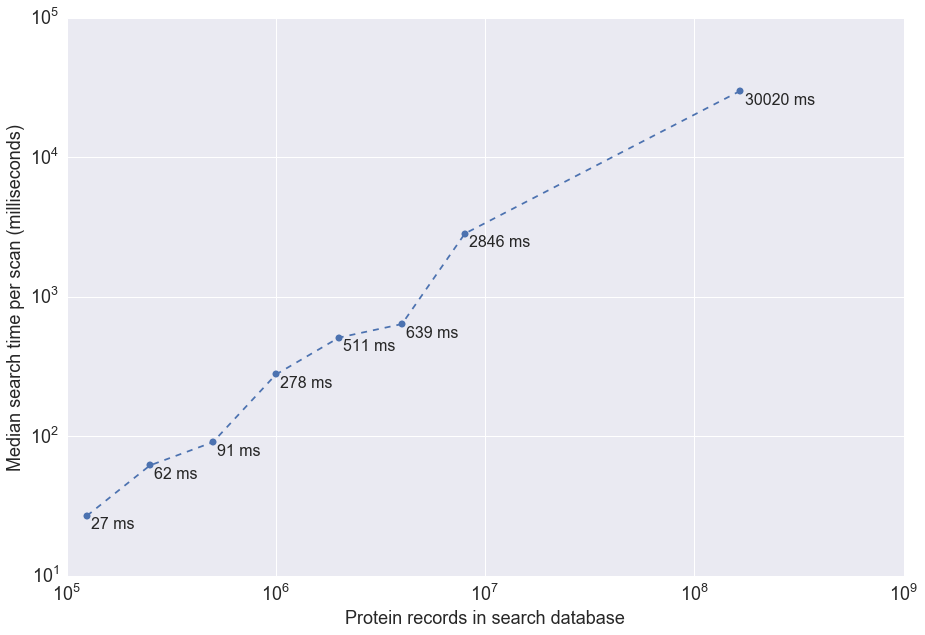

In [3]:
plt.figure(figsize=(15,10))
plt.plot(df['num_proteins'], df['search_time_ms'], marker='o', linestyle='--')
plt.tick_params(axis='both', labelsize=18)
plt.xlabel('Protein records in search database', fontsize=18)
plt.ylabel('Median search time per scan (milliseconds)', fontsize=18)

# set log scale on both axes
plt.xscale('log')
plt.yscale('log')

for _, row in df.iterrows():
    xval = row['num_proteins']
    yval = row['search_time_ms']
    
    plt.annotate('{} ms'.format(yval), xy=(xval, yval), xytext=(xval*1.05, yval*0.8), fontsize=16)

plt.savefig('searchtime_loglog.png', dpi=300)
plt.show()

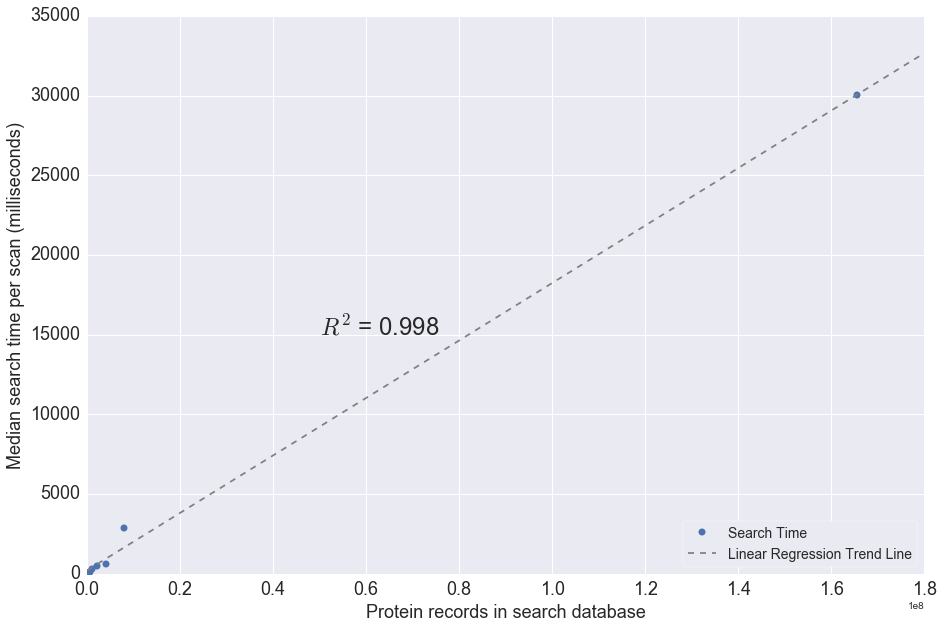

In [4]:
# calculate trendline
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df['num_proteins'], df['search_time_ms'])

plt.figure(figsize=(15,10))
plt.plot(df['num_proteins'], df['search_time_ms'], marker='o', linestyle='', label='Search Time')
plt.tick_params(axis='both', labelsize=18)
plt.xlabel('Protein records in search database', fontsize=18)
plt.ylabel('Median search time per scan (milliseconds)', fontsize=18)

axes = plt.gca()
xmin, xmax = axes.get_xlim()
reg_x_vals = np.linspace(xmin, xmax)
reg_y_vals = slope * reg_x_vals + intercept
plt.plot(reg_x_vals, reg_y_vals, label='Linear Regression Trend Line', linestyle='--', c='grey')

plt.annotate(r'$R^2$ = {:.3f}'.format(r_value**2), xy=(50000000,15000), fontsize=24)
plt.legend(fontsize=14, loc='lower right', frameon=True, fancybox=True)

plt.savefig('searchtime.png', dpi=300)
plt.show()